In [1]:
# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

pd.options.display.float_format = '{:,.2f}'.format

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioLab as pl
import investpy

[<img style="float: right;" src="https://www.futureproof.pt/files/f_photos/f_shares/logo-future-proof_smaller.png" alt="FP" border="0">](https://www.futureproof.pt/)

In [2]:
%%capture
IWDA = investpy.get_etf_historical_data(etf='iShares Core MSCI World UCITS',
                                      from_date='01/01/2000',
                                      to_date='01/01/2022',
                                      country='netherlands')[['Close']]

IWDA.columns=['IWDA']

In [26]:
pl.ichart(IWDA, title='Cotação do IWDA (Amesterdão)', yticksuffix='€', source_text='Fonte: Investing')

In [4]:
pl.compute_ms_performance_table(IWDA)

**Performance from 2009-10-14 to 2021-02-15 (≈ 11.3 years)**

CAGR   Return  StdDev  Sharpe   Max DD  MAR
S.I.      12.26%  271.51%  15.73%    0.78  -33.64% 0.36
1 Year     6.22%    6.22%  26.15%    0.24  -33.64% 0.18
3 Years   13.44%   45.99%  18.33%    0.73  -33.64% 0.40
5 Years   13.68%   89.90%  16.04%    0.85  -33.64% 0.41
10 Years  11.11%  186.68%  15.94%    0.70  -33.64% 0.33

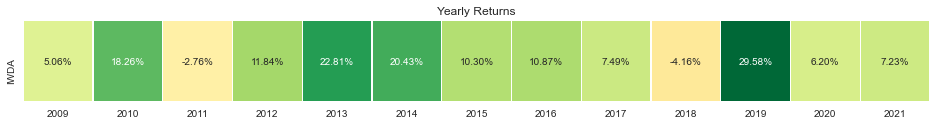

In [5]:
pl.compute_yearly_returns(IWDA, style='chart');

In [6]:
pl.compute_yearly_returns_warning(IWDA);

*Note: First Year only has performance since 2009-10-14*

In [7]:
IWDA_DD = pl.compute_drawdowns(IWDA)

pl.ichart(IWDA_DD, yticksuffix='%', colors=['#f48c06'], title='Drawdowns do IWDA', source_text='Fonte: Investing (Cálculos da Future Proof)')

In [8]:
pl.compute_drawdowns_table(IWDA)

Begin         End    Depth                       Length
1  2020-02-19  2021-01-07  -33.64%  0 Years, 10 Months, 18 Days
2  2015-04-15  2016-11-24  -22.51%    1 Years, 7 Months, 9 Days
3  2011-02-16  2012-02-17   -20.3%    1 Years, 0 Months, 1 Days
4  2018-10-03  2019-04-01  -15.91%   0 Years, 5 Months, 29 Days
5  2010-04-26  2010-11-25  -10.33%   0 Years, 6 Months, 30 Days

In [9]:
daily_change_IWDA = IWDA.pct_change() * 100
pl.ichart(round(daily_change_IWDA, 2), yticksuffix='%', hovermode='closest', title='Variações percentuais diárias do IWDA', source_text='Fonte: Investing (Cálculos da Future Proof)')

In [10]:
IWDA_norm = pl.normalize(IWDA)

In [11]:
IWDA_10k = round(IWDA_norm * 100)
pl.ichart(IWDA_10k, title='Crescimento de cada 10.000€ investidos no IWDA', yticksuffix=' €', style='area', y_axis_range_range=[9000, 37000], yTitle='Em milhares de €uros', source_text='Fonte: Investing (Cálculos da Future Proof)')

In [12]:
IWDA_10k_DD = (IWDA_10k - IWDA_10k.cummax() -1)

pl.ichart(IWDA_10k_DD, colors=['#f48c06'], title='Drawdowns do IWDA', style='area', yticksuffix=' €', source_text='Fonte: Investing (Cálculos da Future Proof)')

In [13]:
IWDA_10k_2020 = round(pl.normalize(IWDA_10k.loc['2019-12-31':]) * 100)

In [14]:
pl.ichart(IWDA_10k_2020, title='Crescimento de cada 10.000€ investidos no IWDA a 2019-12-31', yticksuffix=' €', style='area',
          y_axis_range_range=[6500, 11500], yTitle='Em milhares de €uros', colors=['rgb(128, 177, 211)'], source_text='Fonte: Investing (Cálculos da Future Proof)')

In [15]:
IWDA_10k_DD_2020 = (IWDA_10k_2020 - IWDA_10k_2020.cummax() -1)

pl.ichart(IWDA_10k_DD_2020, title='Drawdowns de 10.000 euros investidos em IWDA em 2019-12-31', style='area', yticksuffix=' €', colors=['rgb(131, 90, 241)'], source_text='Fonte: Investing (Cálculos da Future Proof)')

In [16]:
ret_euros_day_2020 = IWDA_10k_2020 - IWDA_10k_2020.shift()

In [17]:
pl.ichart(ret_euros_day_2020, colors=['#00296b'], style='area', yticksuffix=' €', title='Variações diárias de 10.000 euros investidos em IWDA em 2019-12-31', source_text='Fonte: Investing (Cálculos da Future Proof)')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning:

invalid value encountered in less

C:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning:

invalid value encountered in greater



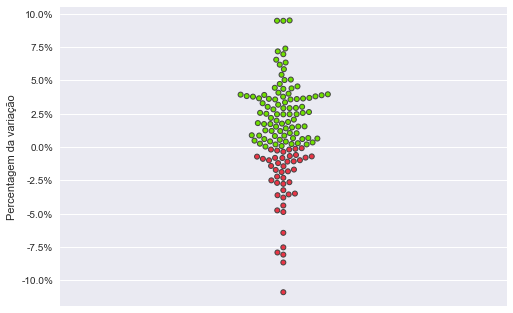

In [18]:
my_pal = ["royalblue", "orange", "dimgrey"]

IWDA_ret_M = IWDA.resample('M').last().pct_change() 

IWDA_ret_M['Sign'] = IWDA_ret_M['IWDA'] > 0

ax = sns.swarmplot(y=IWDA_ret_M['IWDA'], x=[""]*len(IWDA_ret_M), orient='v', hue=IWDA_ret_M['Sign'], linewidth=1,  palette=['#ea3546', '#70e000']);
plt.legend([],[], frameon=False)
ax.set_ylabel('Percentagem da variação')

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

In [19]:
IWDA_ret_M['Sign'].sum()

91

In [20]:
len(IWDA_ret_M) - IWDA_ret_M['Sign'].sum()

46

In [21]:
round(IWDA_ret_M['Sign'].sum() / (len(IWDA_ret_M) - IWDA_ret_M['Sign'].sum()), 2)

1.98

In [22]:
pl.ichart(IWDA_DD, style='drawdowns_histogram', ytickformat=".1%", xticksuffix='%', dd_range=[-68, 0], source_text='Fonte: Investing (Cálculos da Future Proof)')

In [23]:
### Creation of All_days Database ###
all_dates = pd.DataFrame(pd.date_range(start=IWDA.index[0], end=IWDA.index[-1], freq='D'))
all_dates.set_index(all_dates[0], inplace=True)
all_dates[0] = 0

IWDA_all = all_dates.merge(IWDA, left_index = True, right_index = True, how='outer').fillna(method='ffill')[['IWDA']]

IWDA_rr_1 = pl.compute_rolling_cagr(IWDA_all, 1)
IWDA_rr_3 = pl.compute_rolling_cagr(IWDA_all, 3)
IWDA_rr_5 = pl.compute_rolling_cagr(IWDA_all, 5)
IWDA_rr_10 = pl.compute_rolling_cagr(IWDA_all, 10)

IWDA_rr = pl.merge_time_series(IWDA_rr_1, IWDA_rr_3)
IWDA_rr = pl.merge_time_series(IWDA_rr, IWDA_rr_5)
IWDA_rr = pl.merge_time_series(IWDA_rr, IWDA_rr_10)

IWDA_rr.columns =  ['1 Ano', '3 Anos', '5 Anos', '10 Anos']

pl.ichart(round(IWDA_rr * 100, 3), yticksuffix='%', source_text='Fonte: Investing (Cálculos da Future Proof)', title='Retornos rolantes do IWDA a 1, 3, 5, e 10 anos')

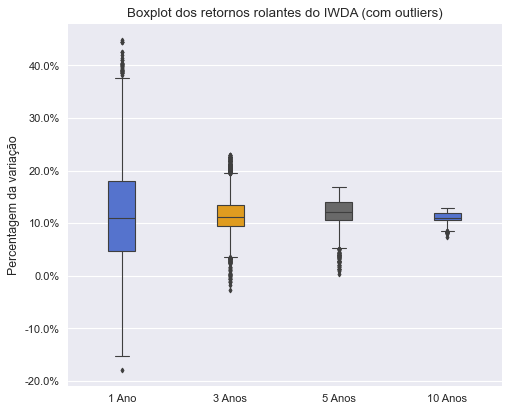

In [24]:
plt.figure(figsize=(7, 6), dpi=80)
ax = sns.boxplot(data=IWDA_rr, orient="v", linewidth=1, width=0.25, fliersize=3,  palette=my_pal, whis=1.5)
ax.set_title("Boxplot dos retornos rolantes do IWDA (com outliers)")
ax.set_xlabel('')
ax.set_ylabel('Percentagem da variação')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
plt.show()

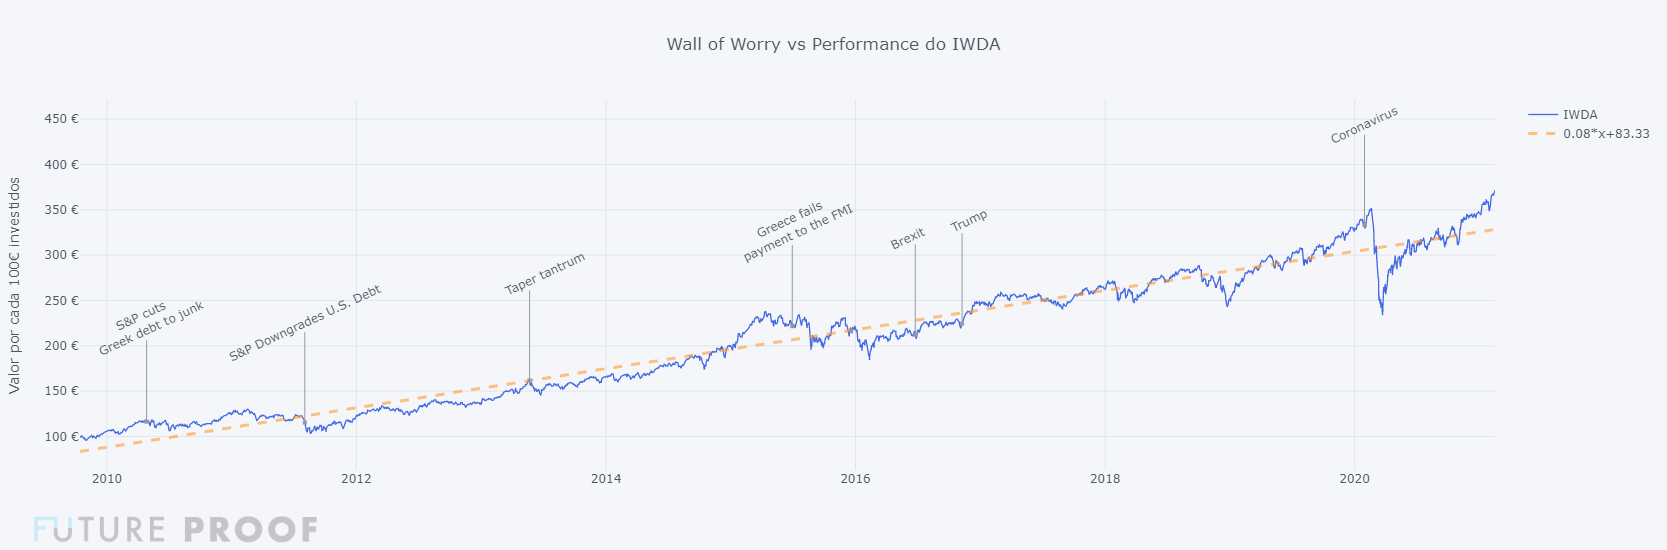

In [25]:
annotations={'2011-08-03':'S&P Downgrades U.S. Debt',
             '2013-05-22':'        Taper tantrum',
             '2010-04-27':'S&P cuts <BR> Greek debt to junk',
             '2015-06-30':'Greece fails' \
             '<BR> payment to the FMI',
             '2016-06-24':'Brexit    ',
             '2016-11-08': '    Trump',            
             '2020-01-30': 'Coronavirus'}

fig = round(pl.normalize(IWDA), 2).iplot(kind='scatter', title='Wall of Worry vs Performance do IWDA', yTitle='Valor por cada 100€ investidos',
                                         color='royalblue', bestfit=True, annotations=annotations, dimensions=(990, 550), textangle=335, asFigure=True)

fig.update_layout(title_x=0.5,
                yaxis = dict(ticksuffix=' €'),
                images= [dict(
                    name= "watermark_1",
                    source= "https://raw.githubusercontent.com/LuisSousaSilva/Articles_and_studies/master/LOGO-future-blue.png",
                    xref= "paper",
                    yref= "paper",
                    x= -0.0325,
                    y= -0.125,
                    sizex= 0.2,
                    sizey= 0.1,
                    opacity= 0.2,
                    layer= "below"
                )],
                  
                 )